In [ ]:
# 한글화
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumBarunGothic'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


# 해면어업_생산량_평균가 관계 파악해보기
결측값이 없는 지역 중 몇 개만 뽑아서 lineplot으로 흐름을 살펴보았습니다

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 광어

In [ ]:
ff_production = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data/행정구역별 해면어업 넙치류 생산량.csv')
ff_price = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data/행정구역별_평균가_광어(해면어업).csv')

In [ ]:
# 컬럼명 재정의 
for y in range(3):
  for m in range(1,10) :
    old_col = ff_production.columns[12*y+m]
    new_col = ff_production.columns[12*y+m].replace(" ","").replace(f"{2019+y}.0{m}월",f"{2019+y}.{m}") 
    ff_production.rename(columns = {old_col:new_col}, inplace =True) 
# ff_production.columns[1].replace(" ","").replace(f"{2018+1}.0{str(1)}월",f"{2018+1}년.{str(1)}") 
  for m in range(10,13):
    old_col = ff_production.columns[12*y+m]
    new_col = ff_production.columns[12*y+m].replace(" ","").replace("월","").replace("년","")
    ff_production.rename(columns = {old_col:new_col}, inplace =True) 

In [ ]:
ff_production.drop([3,10], axis=0, inplace=True)
ff_production.reset_index(drop=True, inplace=True)

In [ ]:
ff_production['행정구역별'].values

array(['부산광역시', '인천광역시', '울산광역시', '강원도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도'], dtype=object)

In [ ]:
ff_prod = ff_production.set_index('행정구역별')
ff_pri = ff_price.set_index('행정구역별')

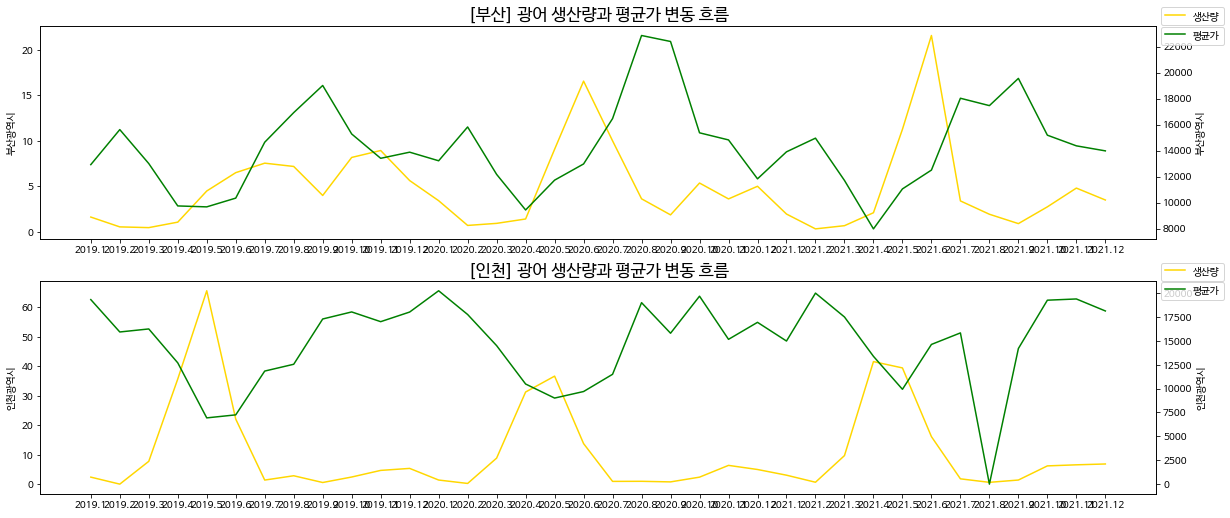

In [ ]:
plt.figure( figsize=(20,18) )

plt.subplot( 4, 1, 1)
plt.title('[부산] 광어 생산량과 평균가 변동 흐름', fontsize = 17)
sns.lineplot( data=ff_production.loc[0], x = ff_production.columns[1:], y=ff_prod.loc['부산광역시',:], color='gold',label='생산량')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.11)) 
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=ff_price.loc[0] ,x = ff_production.columns[1:] ,y=ff_pri.loc['부산광역시',:], ax=ax2, color='green', label='평균가')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.02))

plt.subplot( 4, 1, 2)
plt.title('[인천] 광어 생산량과 평균가 변동 흐름', fontsize = 17)
sns.lineplot( data=ff_production.loc[1], x = ff_production.columns[1:], y=ff_prod.loc['인천광역시',:], color='gold',label='생산량')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.11)) 
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=ff_price.loc[1] ,x = ff_production.columns[1:] ,y=ff_pri.loc['인천광역시',:], ax=ax2, color='green', label='평균가')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.02))

# 방어
결측값이 없는 지역 중 몇 개만 뽑아서 lineplot으로 흐름을 살펴보았습니다

In [ ]:
yt_production = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data/행정구역별 해면어업 방어류 생산량.csv')
yt_price = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data/행정구역별_평균가_방어(해면어업).csv')

# 컬럼명 재정의 
for y in range(3):
  for m in range(1,10) :
    old_col = yt_production.columns[12*y+m]
    new_col = yt_production.columns[12*y+m].replace(" ","").replace(f"{2019+y}.0{m}월",f"{2019+y}.{m}") 
    yt_production.rename(columns = {old_col:new_col}, inplace =True) 
# ff_production.columns[1].replace(" ","").replace(f"{2018+1}.0{str(1)}월",f"{2018+1}년.{str(1)}") 
  for m in range(10,13):
    old_col = yt_production.columns[12*y+m]
    new_col = yt_production.columns[12*y+m].replace(" ","").replace("월","").replace("년","")
    yt_production.rename(columns = {old_col:new_col}, inplace =True) 

In [ ]:
yt_production.drop([9], axis=0, inplace=True)

In [ ]:
yt_production['행정구역별'].values

array(['부산광역시', '인천광역시', '울산광역시', '강원도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도'], dtype=object)

In [ ]:
yt_prod = yt_production.set_index('행정구역별')
yt_pri = yt_price.set_index('행정구역별')

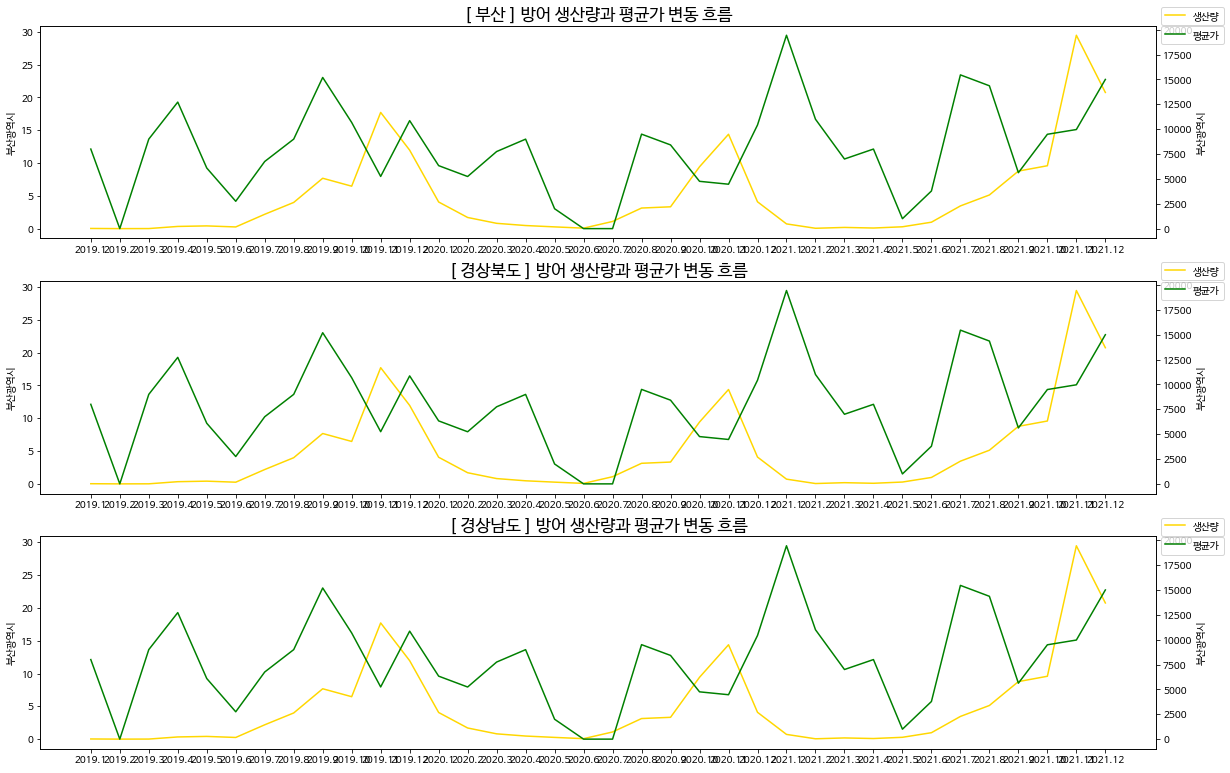

In [ ]:
plt.figure( figsize=(20,18) )

plt.subplot( 4, 1, 1)
plt.title('[ 부산 ] 방어 생산량과 평균가 변동 흐름', fontsize = 17)
sns.lineplot( data=yt_production.loc[0], x = yt_production.columns[1:], y=yt_prod.loc['부산광역시',:], color='gold',label='생산량')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.11)) 
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=yt_price.loc[0] ,x = yt_production.columns[1:] ,y=yt_pri.loc['부산광역시',:], ax=ax2, color='green', label='평균가')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.02))

plt.subplot( 4, 1, 2)
plt.title('[ 경상북도 ] 방어 생산량과 평균가 변동 흐름', fontsize = 17)
sns.lineplot( data=yt_production.loc[7], x = yt_production.columns[1:], y=yt_prod.loc['부산광역시',:], color='gold',label='생산량')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.11)) 
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=yt_price.loc[7] ,x = yt_production.columns[1:] ,y=yt_pri.loc['부산광역시',:], ax=ax2, color='green', label='평균가')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.02))

plt.subplot( 4, 1, 3)
plt.title('[ 경상남도 ] 방어 생산량과 평균가 변동 흐름', fontsize = 17)
sns.lineplot( data=yt_production.loc[8], x = yt_production.columns[1:], y=yt_prod.loc['부산광역시',:], color='gold',label='생산량')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.11)) 
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=yt_price.loc[8] ,x = yt_production.columns[1:] ,y=yt_pri.loc['부산광역시',:], ax=ax2, color='green', label='평균가')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.02))

# 감성돔
결측값이 없는 지역 중 몇 개만 뽑아서 lineplot으로 흐름을 살펴보았습니다

In [ ]:
bp_production = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data/행정구역별 해면어업 감성돔 생산량.csv')
bp_price = pd.read_csv('/content/drive/MyDrive/멀티캠퍼스/2조/이경희/상관관계 분석 data//행정구역별_평균가_감성돔(해면어업).csv')

# 컬럼명 재정의 
for y in range(3):
  for m in range(1,10) :
    old_col = bp_production.columns[12*y+m]
    new_col = bp_production.columns[12*y+m].replace(" ","").replace(f"{2019+y}.0{m}월",f"{2019+y}.{m}") 
    bp_production.rename(columns = {old_col:new_col}, inplace =True) 
# ff_production.columns[1].replace(" ","").replace(f"{2018+1}.0{str(1)}월",f"{2018+1}년.{str(1)}") 
  for m in range(10,13):
    old_col = bp_production.columns[12*y+m]
    new_col = bp_production.columns[12*y+m].replace(" ","").replace("월","").replace("년","")
    bp_production.rename(columns = {old_col:new_col}, inplace =True) 

In [ ]:
bp_production['행정구역별'].values

array(['부산광역시', '인천광역시', '울산광역시', '경기도', '강원도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주도'], dtype=object)

In [ ]:
# 해당하지 않는 지역 제거
bp_production.drop([3,10], axis=0, inplace=True)
bp_production.reset_index(drop=True, inplace=True)

# x축 설정을 편하게 하기 위한 인덱스 처리
bp_prod = bp_production.set_index('행정구역별')
bp_pri = bp_price.set_index('행정구역별')

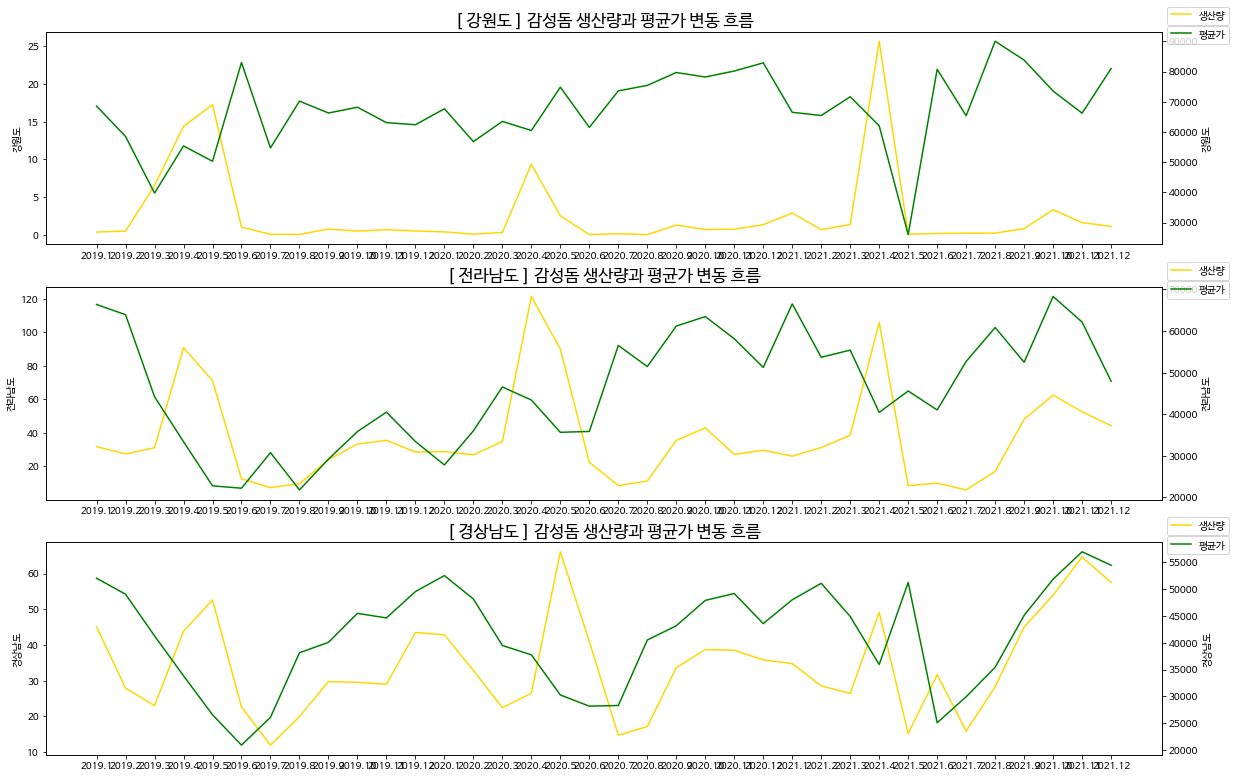

In [ ]:
plt.figure( figsize=(20,18) )

plt.subplot( 4, 1, 1)
plt.title('[ 강원도 ] 감성돔 생산량과 평균가 변동 흐름', fontsize = 17)
sns.lineplot( data=bp_production.loc[3], x = bp_production.columns[1:], y=bp_prod.loc['강원도',:], color='gold',label='생산량')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.14)) 
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=bp_price.loc[3] ,x = bp_production.columns[1:] ,y=bp_pri.loc['강원도',:], ax=ax2, color='green', label='평균가')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.05))

plt.subplot( 4, 1, 2)
plt.title('[ 전라남도 ] 감성돔 생산량과 평균가 변동 흐름', fontsize = 17)
sns.lineplot( data=bp_production.loc[6], x = bp_production.columns[1:], y=bp_prod.loc['전라남도',:], color='gold',label='생산량')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.14)) 
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=bp_price.loc[6] ,x = bp_production.columns[1:] ,y=bp_pri.loc['전라남도',:], ax=ax2, color='green', label='평균가')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.05))

plt.subplot( 4, 1, 3)
plt.title('[ 경상남도 ] 감성돔 생산량과 평균가 변동 흐름', fontsize = 17)
sns.lineplot( data=bp_production.loc[8], x = bp_production.columns[1:], y=bp_prod.loc['경상남도',:], color='gold',label='생산량')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.14)) 
ax = plt.gca()
ax2 = ax.twinx()
sns.lineplot( data=bp_price.loc[8] ,x = bp_production.columns[1:] ,y=bp_pri.loc['경상남도',:], ax=ax2, color='green', label='평균가')
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.05))